<a href="https://colab.research.google.com/github/malumisa/test/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import re

# additions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [29]:
# Load the data
df = pd.read_csv("/content/Result_Protein_Peptide_Combine.csv")

In [30]:
df.head()

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,62329,62437,62723,62732,62792,63875,63889,64669,64674,65043
0,0,10.0,6.0,15.0,0.0,0,8984260.0,53855.6,8579740.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6,8.0,10.0,34.0,0.0,0,8279770.0,45251.9,8655890.0,49927.5,...,0,0,0,0,0,0,0,0,0,0
2,12,10.0,10.0,41.0,0.0,1,8382390.0,53000.9,8995640.0,45519.2,...,0,0,0,0,0,0,0,0,0,0
3,36,17.0,18.0,51.0,0.0,1,10671500.0,58108.4,9985420.0,52374.0,...,0,0,0,0,0,0,0,0,0,0
4,6,8.0,2.0,21.0,0.0,0,6177730.0,42682.6,3596660.0,25698.8,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Define the target and feature variables
df['sum_score'] = df[df.filter(regex='updrs').columns].sum(axis=1)
df.drop(df.filter(regex='updrs').columns, axis=1,inplace =True)
target_variable = ['sum_score']
# target_variable = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
feature_variables = [x for x in df.columns if x != target_variable]

In [32]:
sum_score

0       31.0
1       52.0
2       61.0
3       86.0
4       31.0
        ... 
1063    75.0
1064    24.0
1065    25.0
1066    12.0
1067    26.0
Length: 1068, dtype: float64

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_variables], df[target_variable], test_size=0.2, random_state=1)


In [34]:
# Create a Random Forest classifier instance
rf = RandomForestClassifier(n_estimators=2000, max_depth=10, min_samples_split=5, min_samples_leaf=3,random_state=1)

In [35]:
# Train the Random Forest classifier on the training data
#rf.fit(X_train, y_train)

In [36]:
# Train a separate Random Forest classifier for each target variable
models = {}
for target in target_variable:
    model = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=5, min_samples_leaf=3,random_state=1)
    model.fit(X_train, y_train[target])
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test[target], y_pred, average='weighted')
    print("F1 score for {} = {}".format(target, f1))
    models[target] = model

F1 score for sum_score = 0.08625593793818093


In [44]:
# Make predictions on the testing data
y_pred = rf.predict(X_test)

NotFittedError: ignored

In [39]:
# Calculate the accuracy score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1179.5046728971963


In [38]:
y_pred

array([ 3.,  6.,  2.,  6.,  5.,  4.,  1., 16.,  5., 40.,  5.,  5.,  8.,
       36.,  6.,  6., 15.,  4.,  3.,  6., 40., 38.,  1., 17.,  5.,  6.,
        1., 12.,  6.,  5., 34.,  4., 17., 15.,  1.,  3., 40.,  6., 40.,
        4.,  2.,  4.,  3.,  5.,  6.,  4., 44.,  6.,  1.,  5.,  7.,  1.,
        4.,  1.,  5., 40.,  3.,  2.,  5.,  6.,  5.,  6., 40.,  1., 19.,
        4.,  6.,  5.,  4.,  3.,  2.,  2.,  2., 75.,  2.,  2.,  4.,  5.,
        4.,  5.,  4.,  5.,  6.,  6.,  3.,  5.,  4.,  3.,  5.,  4.,  6.,
        5.,  6.,  4.,  6.,  6.,  5.,  5.,  2.,  6.,  3.,  3., 38., 34.,
       40.,  5., 28.,  3.,  1.,  5.,  1.,  5., 17., 25.,  1.,  2.,  5.,
        3.,  5.,  5.,  8.,  6.,  5., 36.,  4.,  2., 38.,  3.,  5.,  5.,
        2., 34., 34.,  3., 40.,  5.,  4.,  4.,  5.,  1.,  5.,  3.,  2.,
        6.,  4., 40.,  3., 26., 39.,  5.,  4.,  3.,  6.,  5., 36.,  4.,
        4.,  2.,  2.,  4., 39.,  4.,  5., 34.,  2.,  8.,  5.,  3.,  6.,
        4.,  1.,  3., 31.,  6.,  5.,  4.,  2.,  1.,  8.,  2.,  5

In [40]:
y_test

,sum_score
457,21.0
347,74.0
639,2.0
833,7.0
437,9.0
...,...
674,30.0
189,21.0
619,77.0
658,54.0


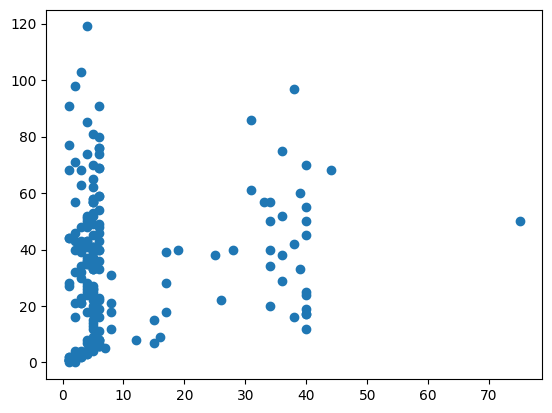

In [41]:
plt.scatter(y_pred, y_test)

In [42]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1179.5046728971963


In [ ]:
# Assuming y_pred and y_test are both arrays of shape (n_samples, n_classes)
# f1_scores = []
# for i in range(y_test.shape[1]):
#     f1 = f1_score(y_test[:,i], y_pred[:,i], average='weighted')
#     f1_scores.append(f1)

# mean_f1 = sum(f1_scores) / len(f1_scores)

# print(f"Mean F1 score: {mean_f1}")

In [43]:
# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[0 1 1 ... 0 0 0]
 [0 5 1 ... 0 0 0]
 [0 2 9 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.33      0.83      0.48         6
         2.0       0.39      0.69      0.50        13
         3.0       0.32      0.67      0.43        12
         4.0       0.14      0.57      0.22         7
         5.0       0.04      0.67      0.08         3
         6.0       0.10      1.00      0.18         3
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         7
         9.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.50     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
